In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
bank = pd.read_csv("bank-full.csv", sep=';')

In [3]:
bank.shape

(45211, 17)

In [4]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
bank.rename(columns={'y':'subscribed'}, inplace=True)

In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [7]:
bank.isnull().any().any()

False

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
housing       45211 non-null object
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
subscribed    45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
def countPlot(column, data, palette='summer', xrotaion=0, title="", hue=None, label = True):
    plt.figure(figsize=(8,6))
    plt.xticks(rotation=xrotaion)
    plt.title(title)
    values = data[column].value_counts()
    ax = sns.countplot(column, order=values.index,data=data, palette=palette, hue=hue)
    if label:
        min_val = values.min()
        ytick = ax.get_yticks()[1]
        if(min_val/4 > ytick) :
            min_val = ytick/5
        else:
            min_val = ytick/4
        for i, v in enumerate(values.values):
            ax.text(i, v + min_val/2, str(v), fontweight='bold',ha='center', color='red')

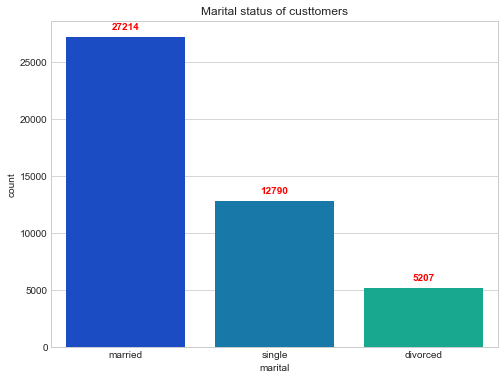

In [10]:
countPlot('marital', bank, 'winter', title='Marital status of custtomers')

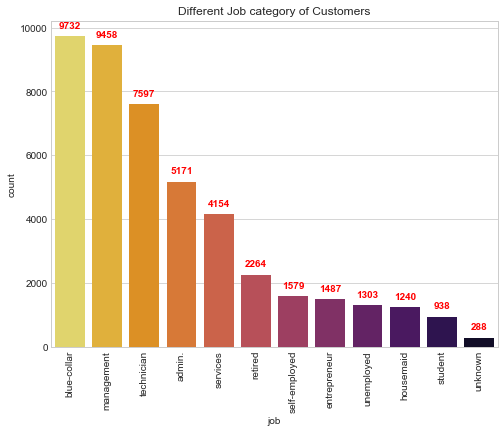

In [11]:
countPlot('job', bank, 'inferno_r', 90, title="Different Job category of Customers")

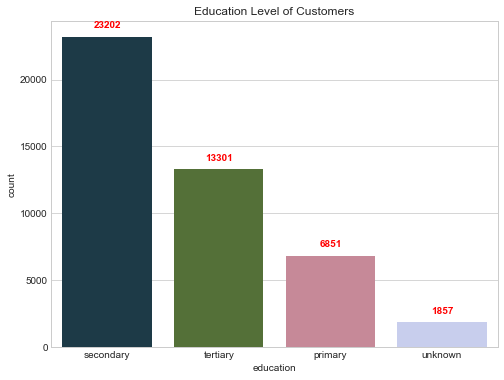

In [12]:
countPlot('education', bank, palette='cubehelix', title="Education Level of Customers")

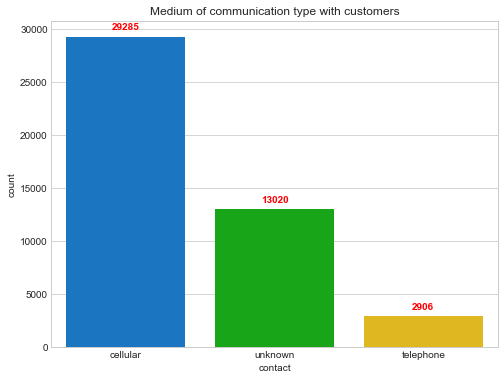

In [13]:
countPlot('contact', data=bank, palette="nipy_spectral", title="Medium of communication type with customers")

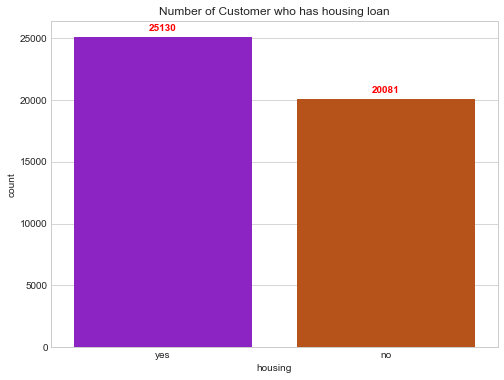

In [14]:
countPlot('housing',bank, palette='gnuplot',title='Number of Customer who has housing loan')

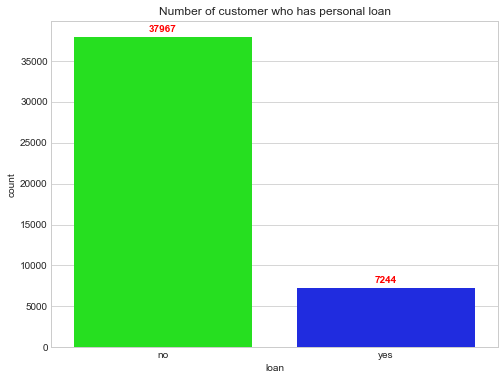

In [15]:
countPlot('loan',bank,title='Number of customer who has personal loan', palette='hsv')

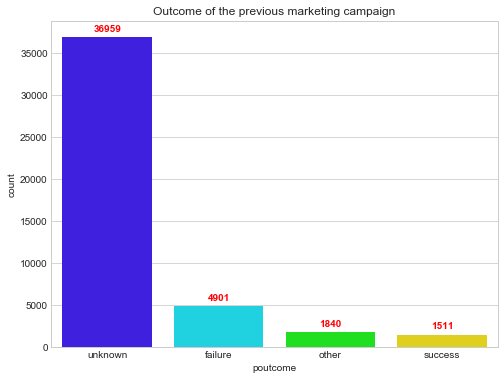

In [16]:
countPlot('poutcome', bank, title='Outcome of the previous marketing campaign', palette='gist_rainbow_r')

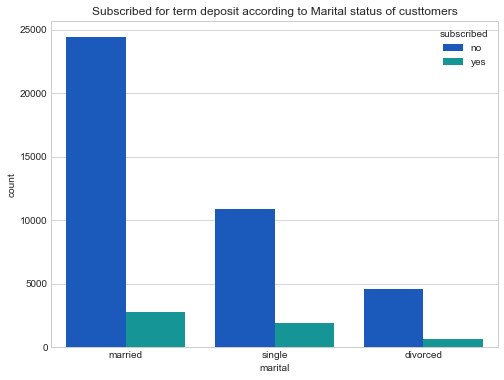

In [17]:
countPlot('marital', bank, 'winter', title='Subscribed for term deposit according to Marital status of custtomers', hue='subscribed', label=False)

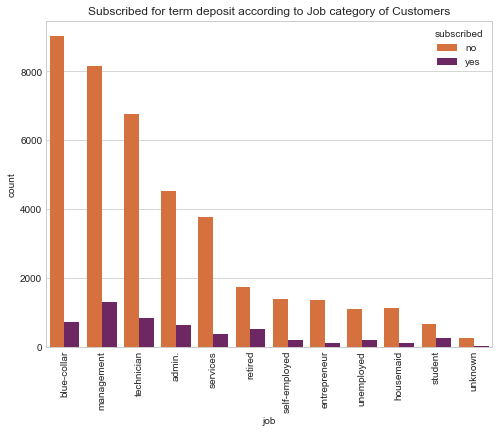

In [18]:
countPlot('job', bank, 'inferno_r', 90, title="Subscribed for term deposit according to Job category of Customers", label=False, hue='subscribed')

From above graph we observe that only Managment and technical job related are only some intrest in term deposit

In [19]:
from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = True
rcParams['patch.facecolor'] = 'r'

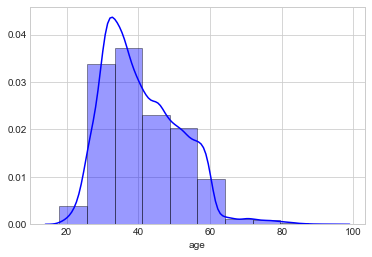

In [20]:
sns.set_palette('magma')
sns.distplot(bank['age'], bins=10, kde=True, norm_hist=False, color='b')

This graph show that there are outliers in age

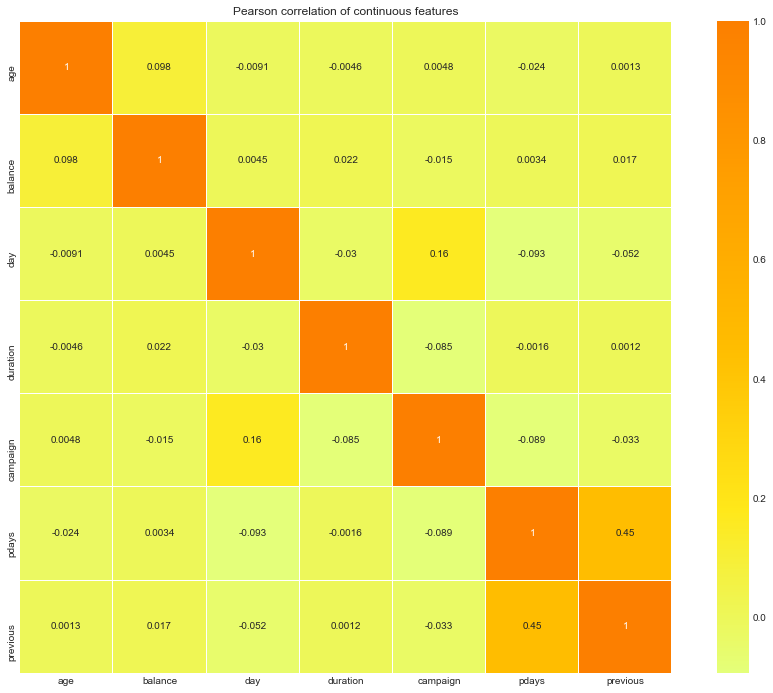

In [21]:
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1, size=12)
sns.heatmap(bank.corr(), cmap='Wistia', linewidths=0.11, square=True, annot=True)

In [22]:
# Lets Do some Data Cleaning

In [23]:
# According to my uderstanding Bank campaign result and related info to campaign is not valuable for analysis. 
# It may be help post analysis
bank.drop(['contact', 'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome'], axis=1, inplace=True)

In [24]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
housing       45211 non-null object
loan          45211 non-null object
subscribed    45211 non-null object
dtypes: int64(2), object(7)
memory usage: 3.1+ MB


In [25]:
job = pd.get_dummies(bank['job'],drop_first=True)
marital = pd.get_dummies(bank['marital'],drop_first=True)
education = pd.get_dummies(bank['education'],drop_first=True)
housing = pd.get_dummies(bank['housing'],drop_first=True)
default = pd.get_dummies(bank['default'],drop_first=True)
# contact = pd.get_dummies(bank['contact'],drop_first=True)
# month = pd.get_dummies(bank['month'],drop_first=True)
loan = pd.get_dummies(bank['loan'],drop_first=True)
#poutcome = pd.get_dummies(bank['loan'],drop_first=True)

In [26]:
bank.drop(['job', 'marital', 'education', 'default', 'housing','loan'], axis=1, inplace=True)

In [27]:
bank = pd.concat([bank, job, marital, education, housing, default, loan], axis=1)

In [28]:
bank.head()

,age,balance,subscribed,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,...,unemployed,unknown,married,single,secondary,tertiary,unknown,yes,yes,yes
0,58,2143,no,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,44,29,no,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2,33,2,no,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
3,47,1506,no,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,33,1,no,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


### Check important feature in dataset

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(bank.drop('subscribed',axis=1), bank['subscribed'], test_size=0.30, random_state=101)

In [31]:
import statsmodels.api as sm
logit_model=sm.Logit(list(map(lambda x:1 if x == 'yes' else 0, y_train)),X_train) #Since sm modle not accepting string array
result=logit_model.fit()
print(result.summary())

C:\Users\AMIT\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.344174
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31626
Method:                           MLE   Df Model:                           20
Date:                Mon, 15 Jan 2018   Pseudo R-squ.:                 0.04455
Time:                        12:36:36   Log-Likelihood:                -10892.
converged:                       True   LL-Null:                       -11400.
                                        LLR p-value:                1.776e-202
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
age              -0.0192      0.001    -13.491      0.000      -0.022      -0.016
balance        2.197

From above table we can see  student  unemployed tertiary not contributing much. In real world also student and uneployed not intrested for term deposit

In [32]:
bank.drop(['student', 'tertiary', 'unemployed'], axis=1, inplace=True)

In [33]:
#re-create train and test data

X_train, X_test, y_train, y_test = train_test_split(bank.drop('subscribed',axis=1), bank['subscribed'], test_size=0.30, random_state=101)

## Building a Logistic Regression model

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logModel = LogisticRegression()
logModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
log_predicted = logModel.predict(X_test)

In [37]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logModel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test, log_predicted))

             precision    recall  f1-score   support

         no       0.88      1.00      0.94     11967
        yes       0.67      0.00      0.00      1597

avg / total       0.86      0.88      0.83     13564



- The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

- The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

- The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

- The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

In [40]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<function confusion_matrix at 0x000000000C648840>
Confusion matrix, without normalization
[[11966     1]
 [ 1595     2]]


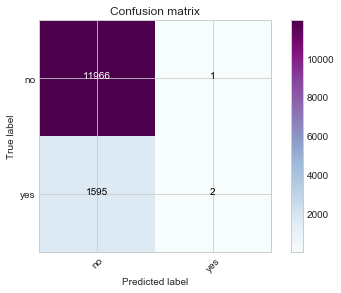

In [41]:
from sklearn.metrics import confusion_matrix
log_confusion_matrix = confusion_matrix(y_test, log_predicted)
print(confusion_matrix)
colormap = plt.cm.BuPu
plot_confusion_matrix(log_confusion_matrix, classes=['no', 'yes'], cmap=colormap, normalize=False)

The result is telling us that we have **11969** correct predictions and **1595** incorrect predictions. 
- Accuracy is (11967+2)/(11967+0+2+1595) = 0.88

In [42]:
# TN/TN+FN
npv = 11969/(11969 + 1595) 
print("Negative predictive value (NPV) %.2f" % npv)

#TP/TP+FP
ppv = 2/(2 + 1) 
print("Positive predictive value (PPV) %.2f" % ppv)
 #TN/TN+FP
specificity = 11969 / (11969 + 1)
 #TP/TP+FN
sensitivity = 2 / (2 + 1595)

print("Specificity value %.2f" % specificity)
print("Sensitivity value %.2f" % sensitivity)

Negative predictive value (NPV) 0.88
Positive predictive value (PPV) 0.67
Specificity value 1.00
Sensitivity value 0.00


- A positive screen test is in itself poor at confirming the customer have term deposit (PPV = 67%) and further investigations must be undertaken; it did, however, correctly identify 0% of all cases (the sensitivity).
- A negative result is very good at reassuring that a customer does not have subscribed a term deposit (NPV = 88%) and at this initial screen correctly identifies 100% of those who do not have a term deposit (the specificity).

In [43]:
# #ROC -. receiver operating characteristic
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# from sklearn.metrics import accuracy_score
# print("accuracy of model %0.2f" % accuracy_score(new_y, log_predicted))
# logit_roc_auc = roc_auc_score(new_y, log_predicted)
# fpr, tpr, thresholds = roc_curve(new_y, logModel.predict_proba(X_test)[:,1])
# # print(tpr)
# plt.figure(figsize=(8,5))
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# # plt.savefig('Log_ROC')

The **receiver operating characteristic (ROC) curve** is a two dimensional graph in which the false positive rate is plotted on the X axis and the true positive rate is plotted on the Y axis. The ROC curves are useful to visualize and compare the performance of classifier methods.

**Sensitivity** (also called the **true positive rate**) and **specificity**(also called the **true negative rate**) are statistical measures of the performance of a binary classification test, also known in statistics as classification function:

- **true positive (TP)** : predicted to be positive and the actual value is also positive- 
- **false positive (FP)** : predicted to be positive but the actual value is negative
- **true negative (TN)** : predicted to be negative and the actual value is also negative
- **false negative (FN)** : predicted to be negative but the actual value is positive

## Cross Validation

In [44]:
from sklearn import model_selection

In [45]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
result = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring='accuracy')
kfold = model_selection.KFold(n_splits=10, random_state=7)
print("10-fold cross validation average accuracy: %.3f" % (result.mean()))

10-fold cross validation average accuracy: 0.883


## Decision Tree

In [46]:
from sklearn import tree

In [47]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [48]:
dt_predict = clf.predict(X_test)

In [49]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [50]:
print(classification_report(y_test, dt_predict))

             precision    recall  f1-score   support

         no       0.91      0.89      0.90     11967
        yes       0.28      0.32      0.30      1597

avg / total       0.83      0.82      0.83     13564



Confusion matrix, without normalization
[[10669  1298]
 [ 1092   505]]


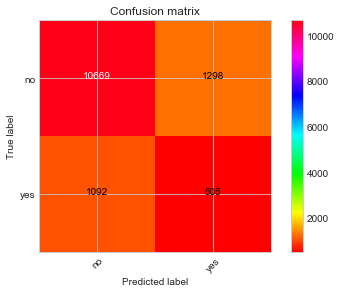

In [51]:
tree_confusion_matrix = confusion_matrix(y_test, dt_predict)
# print(tree_confusion_matrix)
colormap = plt.cm.hsv
plot_confusion_matrix(tree_confusion_matrix, classes=['no', 'yes'], cmap=colormap, normalize=False)

In [52]:
# TN/TN+FN
npv = 10661/(10661 + 1306) 
print("Negative predictive value (NPV) %.2f" % npv)

#TP/TP+FP
ppv = 504/(504 + 1093) 
print("Positive predictive value (PPV) %.2f" % ppv)
 #TN/TN+FP
specificity = 10661 / (10661 + 1093)
 #TP/TP+FN
sensitivity = 504 / (504 + 1306)

print("Specificity value %.2f" % specificity)
print("Sensitivity value %.2f" % sensitivity)

Negative predictive value (NPV) 0.89
Positive predictive value (PPV) 0.32
Specificity value 0.91
Sensitivity value 0.28


- A positive screen test is in itself poor at confirming the customer have term deposit (PPV = 32%) and further investigations must be undertaken; it did, however, correctly identify 28% of all cases (the sensitivity).
- A negative result is very good at reassuring that a customer does not have subscribed a term deposit (NPV = 89%) and at this initial screen correctly identifies 91% of those who do not have a term deposit (the specificity).

In [53]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelTree = tree.DecisionTreeClassifier()
tree_result = model_selection.cross_val_score(modelTree, X_train, y_train, cv=kfold, scoring='accuracy')
kfold = model_selection.KFold(n_splits=10, random_state=7)
print("10-fold cross validation average accuracy: %.3f" % (tree_result.mean()))

10-fold cross validation average accuracy: 0.825


## Random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
forest = RandomForestClassifier()
forest = forest.fit(X_train, y_train)

In [56]:
forest_predict = forest.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(forest.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [57]:
print(classification_report(y_test, forest_predict))

             precision    recall  f1-score   support

         no       0.90      0.96      0.93     11967
        yes       0.43      0.22      0.29      1597

avg / total       0.85      0.87      0.86     13564



Confusion matrix, without normalization
[[11488   479]
 [ 1242   355]]


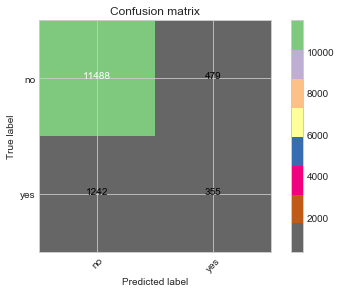

In [58]:
forest_confusion_matrix = confusion_matrix(y_test, forest_predict)
# print(tree_confusion_matrix)
colormap = plt.cm.Accent_r
plot_confusion_matrix(forest_confusion_matrix, classes=['no', 'yes'], cmap=colormap, normalize=False)

In [59]:
# TN/TN+FN
npv = 11470/(11470 + 1229) 
print("Negative predictive value %.2f" % npv)

#TP/TP+FP
ppv = 358/(358 + 497) 
print("Positive predictive value %.2f" % ppv)
 #TN/TN+FP
specificity = 11470 / (11470 + 497)
 #TP/TP+FN
sensitivity = 358 / (358 + 1229)

print("Specificity value %.2f" % specificity)
print("Sensitivity value %.2f" % sensitivity)

Negative predictive value 0.90
Positive predictive value 0.42
Specificity value 0.96
Sensitivity value 0.23


- A positive screen test is in itself poor at confirming the customer have term deposit (PPV = 42%) and further investigations must be undertaken; it did, however, correctly identify 23% of all cases (the sensitivity).
- A negative result is very good at reassuring that a customer does not have subscribed a term deposit (NPV = 90%) and at this initial screen correctly identifies 96% of those who do not have a term deposit (the specificity).

In [60]:
modelForest = tree.DecisionTreeClassifier()
forest_result = model_selection.cross_val_score(modelForest, X_train, y_train, cv=kfold, scoring='accuracy')
kfold = model_selection.KFold(n_splits=10, random_state=7)
print("10-fold cross validation average accuracy: %.3f" % (forest_result.mean()))

10-fold cross validation average accuracy: 0.824


**Conclusion**

I tried all three Logistic/Decision Tree/ Random Forest In which Logistic gave me better result with 88% of accuracy

But in all above three method we are able to predict good nuber of True Negative rather than True positive

Only Decision Tree give some good result with True positve but that is also not too good